# Implémentation d'un _Markov Chain Monte Carlo_ (MCMC) avec l'algorithme de Metropolis.

Nous allons suivre les étapes décrite dans l'excellent article d'introduction au MCMC de David W. Hogg et Daniel Foreman-Mackey, disponible [ici](https://ui.adsabs.harvard.edu/abs/2018ApJS..236...11H/abstract).
La section 3 sera particulièrement utile pour cet exemple.

In [4]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
import tqdm

rng = np.random.default_rng()


[0.61788209 0.78357293 0.16801803 0.39230118 0.89357624 0.15853306
 0.17435141 0.05148386 0.02336123 0.28757674 0.48991576 0.20859244
 0.94053886 0.43192202 0.44047231 0.25515647 0.62356433 0.05360494
 0.88860735 0.26841239 0.40427388 0.04845733 0.04532301 0.50523838
 0.0483556  0.43922028 0.6560803  0.24871359 0.97160799 0.00192889
 0.91981963 0.48623913 0.00760427 0.62851325 0.42301635 0.02432928
 0.35696971 0.11573946 0.88960068 0.71492498 0.36407712 0.59771865
 0.2422401  0.45949171 0.87798295 0.26287242 0.06357438 0.35893901
 0.43424926 0.8687695  0.58044628 0.94252807 0.60835498 0.69816838
 0.16789217 0.97005659 0.16840877 0.27870051 0.48963235 0.15543048
 0.16413662 0.50826634 0.9450403  0.53644454 0.04078319 0.74592713
 0.13852027 0.58142963 0.52978266 0.40334586 0.35811321 0.07898473
 0.88536341 0.20736632 0.4264251  0.74717303 0.64712749 0.58642877
 0.12624115 0.49957338 0.22323681 0.44889027 0.23519949 0.03401203
 0.97133136 0.54730007 0.64638911 0.58046361 0.95812435 0.3240

## Fonction de densité unidimensionnelle (Problèmes 2 et 3 de l'article)
### Densité Gaussienne

Commençons par résoudre le problème no. 2 de l'article:

- Fonction de densité $p(\theta)$ gaussienne à une dimension avec moyenne de 2 et variance de 2.
- Distribution de proposition $q(\theta'|\theta)$ gaussienne pour $\theta'$ avec une moyenne $\theta$ et variance de 1.
- Point initial $\theta = 0$.
- Au moins $10^4$ itérations.

N'oubliez pas d'utiliser le log de la densité $\ln p(\theta)$.

Comme nous devrons réutiliser le code dans les prochaines sections, essayez de séparer votre fonction de log-densité et votre algorithme de Metropolis. Ce dernier pourrait avoir une signature telle que suggérée dans la cellule ci-dessous.

In [19]:
def log_gaussian(theta: float, mean: float=2, var: float = 2) -> float:
    return -0.5 * (theta-mean)**2 / var - 0.5 * np.log(2*np.pi*var)

def Gaussian(x: np.ndarray[float], p: np.ndarray[float] = [1, 0], x0: float = 2.0, omega: float = np.sqrt(2.0)) -> np.ndarray[float]: #the width (omega) and mean (x0) are known and set to default values
    A, B = p #extract the A and B values from the p argument
    return A * np.exp(-(x-x0)**2/(2*omega**2))+B #return 'y'

# def mcmc_metropolis(log_density: Callable, theta0: float, nsteps: int, q_scale: float = 1.0) -> np.ndarray[float]:
#     samples = np.ndarray([])
#     r = rng.random(nsteps)
#     theta = theta0
#     for i in range(nsteps):
#         current_function = log_density(theta, mean = 2, var = 2)
#         proposition_function = log_density(theta, mean=1, var=1)
#         if proposition_function - current_function > np.log(r[i]):
#             theta = proposition_function
#             samples = np.append(samples, theta)
#         else:
#             samples = np.append(samples, theta)
# 
#         """
#         - log_density: fonction de log-densité, accepte un argument theta
#         - theta0: valeur initiale de theta pour le MCMC
#         - nsteps: nombre de pas à faire dans le MCMC
# 
#         La fonction retourne un tableaux d'échantillons pour theta.
#         """
#         # TODO: MCMC
#     return samples
    
    
def mcmc_metropolis(log_density: Callable, theta0: float, nsteps: int, q_scale: float = 1.0) -> np.ndarray[float]:
    theta_array = np.empty(nsteps)
    theta = theta0
    
    for i in tqdm.tqdm(range(nsteps)): #tqdm is used to make progress bars
        thetap = rng.normal(loc=theta, scale=q_scale)
        lnp_theta = log_density(theta)
        lnp_thetap = log_density(thetap)
        
        lnr = np.log(rng.uniform(low=0.0,high=1.0))
        
        if lnp_thetap - lnp_theta > lnr:
            theta = thetap
        theta_array[i] = theta
    
    return theta_array
    

Affichez les échantillons dans un histogrammes et comparez le avec la distribution analytique.

100%|██████████| 10000/10000 [00:00<00:00, 109209.32it/s]


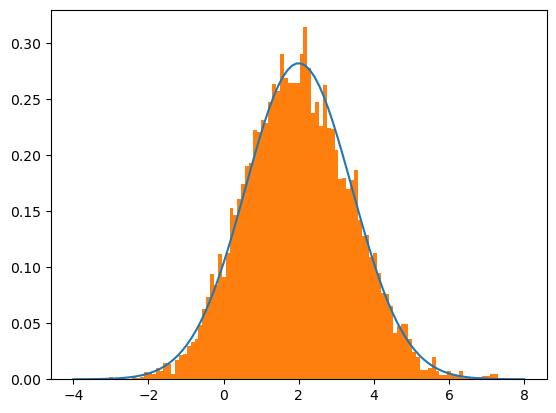

In [39]:
samples = mcmc_metropolis(log_gaussian, 0.0, 10000, q_scale=1) #a reasonable q scale is important!
theta_test = np.linspace(-4, 8, num=100)
plt.plot(theta_test, np.exp(log_gaussian(theta_test)))


plt.hist(samples, density=True, bins=100)
plt.show()

Affichez les échantillons en fonction du nombre d'itération.

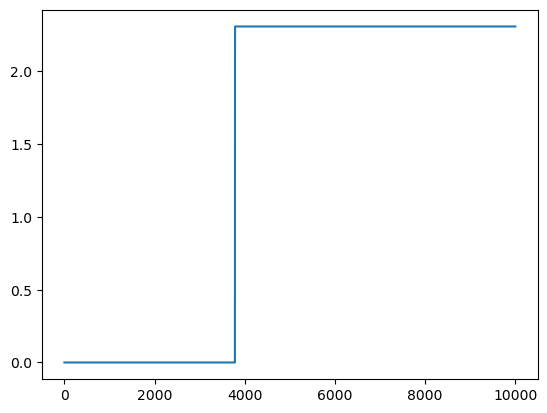

In [38]:
plt.plot(range(10000), samples)
plt.show()

### Impact de l'échelle de la distribution de proposition

Testez différentes échelles pour la distribution de proposition. Quel est l'impact sur l'échantillonnage?

### Distribution Uniforme

Répétez les étapes ci-dessus pour une distribution uniforme entre 3 et 7.
Attention à bien choisir la valeur initiale pour $\theta$.

Réutilisez la fonction que vous avec codé ci-dessus pour faire le MCMC.

Affichez également un histogramme et l'évolution de la chaîne.

100%|██████████| 10000/10000 [00:00<00:00, 100719.05it/s]


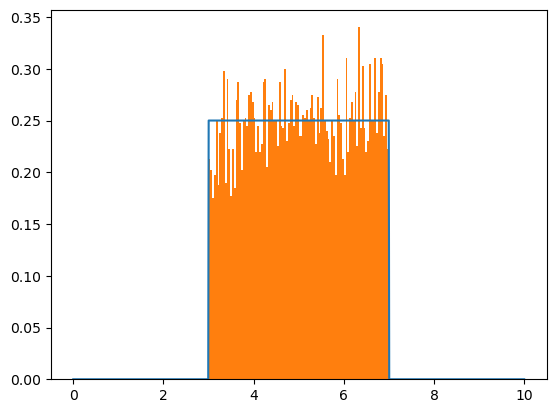

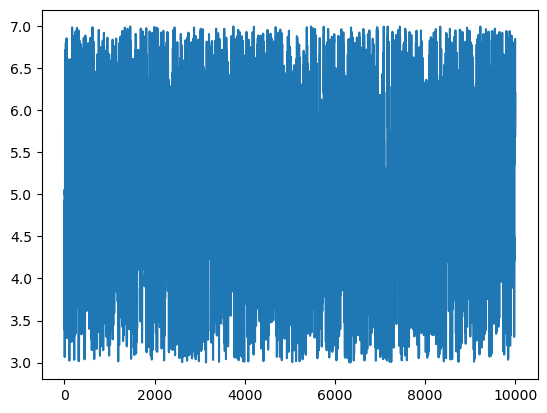

In [49]:
def log_uniform(theta, low=3.0, high=7.0):
    if low <= theta < high:
        return - np.log(high-low)
    return - np.inf

samples = mcmc_metropolis(log_uniform, 5.0, 10000, q_scale=1)
theta_test = np.linspace(0,10,num=1000)
plt.plot(theta_test, np.exp(list(map(log_uniform, theta_test))))
plt.hist(samples, density=True, bins=100)
plt.show()
        
        
plt.plot(range(10000), samples)
plt.show()

## Fonction de densité 2D

Pour échantilloner un problème plus complexe, on peut généraliser le code ci-dessus à une distribution 2D comme demandé au problème 4 de l'article.

Utilisez la matrice de covariance pour la densité $p(\theta)$ où $\theta$ est un vecteur 2D.

$V = \begin{bmatrix}2.0 & 1.2\\1.2 & 2.0\end{bmatrix}$.

Utilisez une distribution de proposition 2D avec une matrice de covariance identité.

Vous pouvez copier et modifier votre fonction 1D et l'ajuster en 2D.

Pour chaque paramètre, affichez l'évolution des chaînes et un histogramme.
Affichez également une carte 2D des échantillons.

100%|██████████| 10000/10000 [00:01<00:00, 7542.54it/s]


(10000, 2)


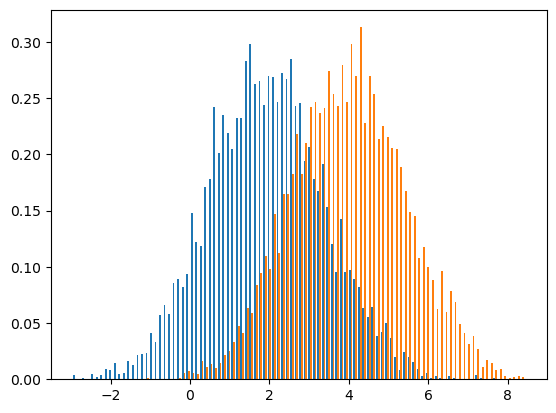

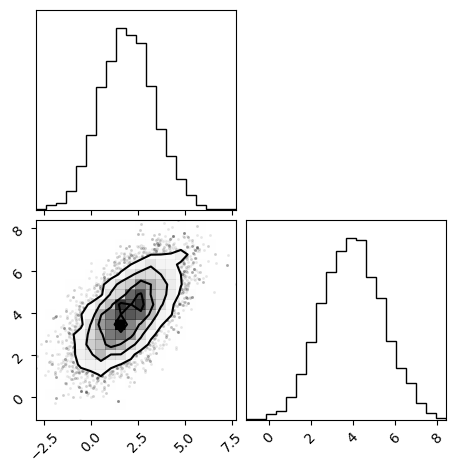

In [65]:
import corner

def mcmc_metropolis_2D(log_density: Callable, theta0: np.ndarray, nsteps: int, q_scale: float = 1.0) -> np.ndarray[float]:
    theta_array = np.empty((nsteps,2))
    theta = theta0
    
    for i in tqdm.tqdm(range(nsteps)): #tqdm is used to make progress bars
        thetap = rng.normal(loc=theta, scale=q_scale)
        lnp_theta = log_density(theta)
        lnp_thetap = log_density(thetap)
        
        lnr = np.log(rng.uniform(low=0.0,high=1.0))
        
        if lnp_thetap - lnp_theta > lnr:
            theta = thetap
            
        theta_array[i] = theta
    
    return theta_array

def log_gaussian_2D(theta: np.ndarray, mean: np.ndarray = [2,4], var: np.ndarray = [[2.0, 1.2],[1.2, 2.0]]) -> np.ndarray:
    return np.log((2 * np.pi)**-1 * np.linalg.det(var) ** (-0.5) * np.exp(-1/2 * 
            np.matmul(np.matmul(np.transpose(theta - mean), np.linalg.inv(var)), (theta-mean))))

samples = mcmc_metropolis_2D(log_gaussian_2D, np.array([0,0]) , 10000, q_scale=1)
print(samples.shape)

theta_test = np.linspace(-4, 8, num=1000)
plt.hist(samples, density=True, bins=100)

plt.show()

figure = corner.corner(samples)
plt.show()



## Bonus: MCMC appliqué à l'analyse de données

Utilisez votre MCMC ci-dessus pour échantillonner la distribution à posteriori du devoir 1.
Vous devrez copier votre code pour le modèle, les distributions et l'importation des données.